In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# Import the sales data
sales = pd.read_csv(r"C:\Users\AR\sales.csv")

In [77]:
# Display the first few rows to understand the data
print(sales.head())

   Product_ID   Sale_Date Sales_Rep Region  Sales_Amount  Quantity_Sold  \
0        1052  03/02/2023       Bob  North       5053.97             18   
1        1093  21/04/2023       Bob   West       4384.02             17   
2        1015  21/09/2023     David  South       4631.23             30   
3        1072  24/08/2023       Bob  South       2167.94             39   
4        1061  24/03/2023   Charlie   East       3750.20             13   

  Product_Category  Unit_Cost  Unit_Price Customer_Type  Discount  \
0        Furniture     152.75      267.22     Returning      0.09   
1        Furniture    3816.39     4209.44     Returning      0.11   
2             Food     261.56      371.40     Returning      0.20   
3         Clothing    4330.03     4467.75           New      0.02   
4      Electronics     637.37      692.71           New      0.08   

  Payment_Method Sales_Channel Region_and_Sales_Rep  
0           Cash        Online            North-Bob  
1           Cash        Re

In [78]:
# Selecting specific columns within a DataFrame
print(sales[['Sales_Rep', 'Sales_Amount', 'Quantity_Sold']])

    Sales_Rep  Sales_Amount  Quantity_Sold
0         Bob       5053.97             18
1         Bob       4384.02             17
2       David       4631.23             30
3         Bob       2167.94             39
4     Charlie       3750.20             13
..        ...           ...            ...
992   Charlie       4733.88              4
993       Bob       4716.36             37
994     David       7629.70             17
995     David       1629.47             39
996     Alice       4923.93             48

[997 rows x 3 columns]


In [79]:
# Show the data types of each column
print(sales.dtypes)

Product_ID                int64
Sale_Date                object
Sales_Rep                object
Region                   object
Sales_Amount            float64
Quantity_Sold             int64
Product_Category         object
Unit_Cost               float64
Unit_Price              float64
Customer_Type            object
Discount                float64
Payment_Method           object
Sales_Channel            object
Region_and_Sales_Rep     object
dtype: object


In [80]:
# Display summary statistics
print(sales.describe())

        Product_ID  Sales_Amount  Quantity_Sold    Unit_Cost   Unit_Price  \
count   997.000000    997.000000     997.000000   997.000000   997.000000   
mean   1050.084253   5014.982166      25.354062  2481.108275  2734.094303   
std      29.548390   2845.612715      14.163135  1415.685048  1417.360824   
min    1001.000000    100.120000       1.000000    60.280000   167.120000   
25%    1024.000000   2550.840000      13.000000  1247.100000  1510.430000   
50%    1051.000000   5012.960000      25.000000  2471.670000  2707.110000   
75%    1075.000000   7499.700000      38.000000  3703.930000  3964.630000   
max    1100.000000   9989.040000      49.000000  4995.300000  5442.150000   

         Discount  
count  997.000000  
mean     0.152257  
std      0.087056  
min      0.000000  
25%      0.080000  
50%      0.150000  
75%      0.230000  
max      0.300000  


In [81]:
# Check if there are any duplicate rows and remove them
sales.drop_duplicates(inplace=True)

In [82]:
# Filter out sales greater than a certain threshold
high_sales = sales[sales['Sales_Amount'] > 5000]
print(high_sales)

     Product_ID   Sale_Date Sales_Rep Region  Sales_Amount  Quantity_Sold  \
0          1052  03/02/2023       Bob  North       5053.97             18   
7          1087  06/01/2023       Eve  South       7698.92             46   
9          1075  09/10/2023   Charlie   West       8239.58             18   
10         1088  16/11/2023       Eve  North       8518.45             13   
12         1024  11/11/2023       Eve   West       6607.80             21   
..          ...         ...       ...    ...           ...            ...   
979        1074  16/12/2023       Bob  North       6310.56             19   
980        1039  01/08/2023       Eve   West       7527.63             36   
986        1025  30/12/2023     David   West       9215.32             28   
991        1068  06/04/2023     Alice  South       9093.50             31   
994        1018  27/04/2023     David  South       7629.70             17   

    Product_Category  Unit_Cost  Unit_Price Customer_Type  Discount  \
0   

In [83]:
# Unique products that is sold
print(sales["Sales_Rep"].unique())

['Bob' 'David' 'Charlie' 'Eve' 'Alice']


In [84]:
# Filtering the data using products with sales above $7500
Best_selling_products = sales[sales['Sales_Amount'] > 7500]['Product_Category'].unique()
print("Products with sales above $5000:", Best_selling_products)

Products with sales above $5000: ['Furniture' 'Clothing' 'Food' 'Electronics']


In [85]:
# Group by Sales Reps and Total Sales Amount
best_reps = sales.groupby("Sales_Rep")["Sales_Amount"].sum().reset_index()

# Sort the reps by total Sales_Amount in descending order
best_reps = best_reps.sort_values("Sales_Amount", ascending=False)

#Rank them in order
best_reps["Rank"] = best_reps["Sales_Amount"].rank(method='dense', ascending=False).astype(int)

best_reps = best_reps.reset_index(drop=True)

print(best_reps)

  Sales_Rep  Sales_Amount  Rank
0     David    1133359.79     1
1       Bob    1078619.91     2
2       Eve     970183.99     3
3     Alice     956962.05     4
4   Charlie     860811.48     5


In [86]:
# Create a new DataFrame for top-selling products
top_selling = sales.groupby('Product_Category')['Sales_Amount'].sum().sort_values(ascending=False)
print(top_selling)

Product_Category
Clothing       1311103.64
Furniture      1260517.69
Electronics    1234919.92
Food           1193395.97
Name: Sales_Amount, dtype: float64


In [87]:
sales.reset_index(inplace=True)

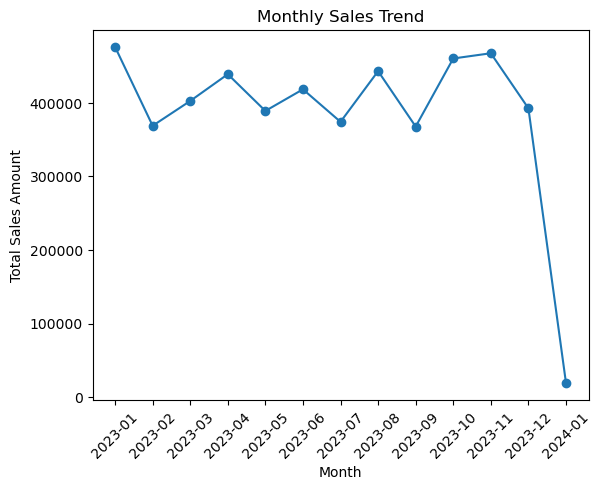

In [92]:
# Plotting Sales by Month
plt.plot(monthly_sales["Month"].astype(str), monthly_sales["Sales_Amount"], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

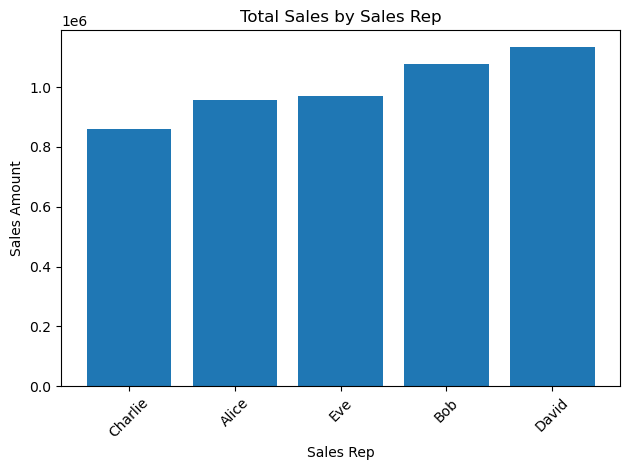

In [93]:
rep_sales = sales.groupby("Sales_Rep")["Sales_Amount"].sum().sort_values()

plt.bar(rep_sales.index, rep_sales.values)
plt.title("Total Sales by Sales Rep")
plt.xlabel("Sales Rep")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [102]:
# Pivot Table for Total Sales Amount by Sales Rep and Region
regional_sales_summary = sales.pivot_table(values="Sales_Amount", index="Sales_Rep", columns="Region", aggfunc="sum")
print(regional_sales_summary)

Region          East      North      South       West
Sales_Rep                                            
Alice      260789.47  249647.22  239414.54  207110.82
Bob        309876.11  233464.81  248829.71  286449.28
Charlie    165172.94  299789.01  156140.68  239708.85
David      276235.94  282539.27  311416.99  263167.59
Eve        239340.90  304172.20  196078.22  230592.67
